# In this notebook I perform bank customer segmentation 

- I use a marketing data with the following varibale definitions;
> # **CUSTID**: Identification of Credit Card holder 
> # **BALANCE**: Balance amount left in customer's account to make purchases
> # **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
> # **PURCHASES**: Amount of purchases made from account
> # **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
> # **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
> # **CASH_ADVANCE**: Cash in advance given by the user
> # **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
> # **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
> # **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
> # **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid
> # **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"
> # **PURCHASES_TRX**: Number of purchase transactions made
> # **CREDIT_LIMIT**: Limit of Credit Card for user
> # **PAYMENTS**: Amount of Payment done by user
> # **MINIMUM_PAYMENTS**: Minimum amount of payments made by user  
> # **PRC_FULL_PAYMENT**: Percent of full payment paid by user
> # **TENURE**: Tenure of credit card service for user


- In a nutshell, giving a banking dataset with creditcard information from customers, how could you identify the usage distribution of the customers credit card. Understanding the creditcard usage trend and serving customers better.

In [1]:
## Mounting drive for data access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Importing necessary dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
## for future warnings
import warnings
warnings.filterwarnings('ignore')

## Uploadind data 

In [3]:
## define data path
data_path = '/content/drive/MyDrive/KOBBY/Udemy_Courses/created_for_Github/marketing_data.csv'

## get dataset
marketing_data = pd.read_csv(data_path)
marketing_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
## Get data information
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
## Basic statistics of the data
marketing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
# Let's see who made one off purchase of $40761!
marketing_data[marketing_data['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [12]:
# Let's see who made cash advance of $47137!

marketing_data[marketing_data['CASH_ADVANCE']==marketing_data.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- This customer made 123 cash advance transactions!!
- Never paid credit card in full

### Exploring the data

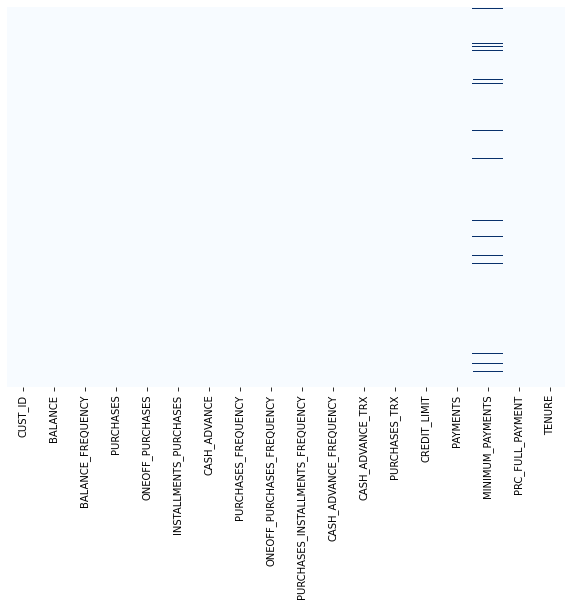

In [10]:
### Graphically visualizing the number of null values in the dataset with the seaborn help
plt.figure(figsize=(10,7))
sns.heatmap(marketing_data.isnull(), 
            yticklabels = False, 
            cbar = False, 
            cmap = 'Blues'
            );

In [11]:
### Let's get the same in numerical values 
marketing_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- The `PRC_FULL_PAYMENT` variable has `313` null values 

In [16]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
marketing_data.loc[(marketing_data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = marketing_data['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
marketing_data.loc[(marketing_data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = marketing_data['CREDIT_LIMIT'].mean()

### Confirm the new status of null values
marketing_data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- Hooooo!!!! we are free from null values

In [19]:
# Let's see if we have duplicated entries in the data
marketing_data.duplicated().sum()

0

- We're good then!

In [20]:
# Let's discard the Customer ID since it has no meaning here 
marketing_data.drop('CUST_ID', axis = 1, inplace= True)

### Plotting the distribution of the variables using the KDE. This gives us the spread of the data points from the normal distribution

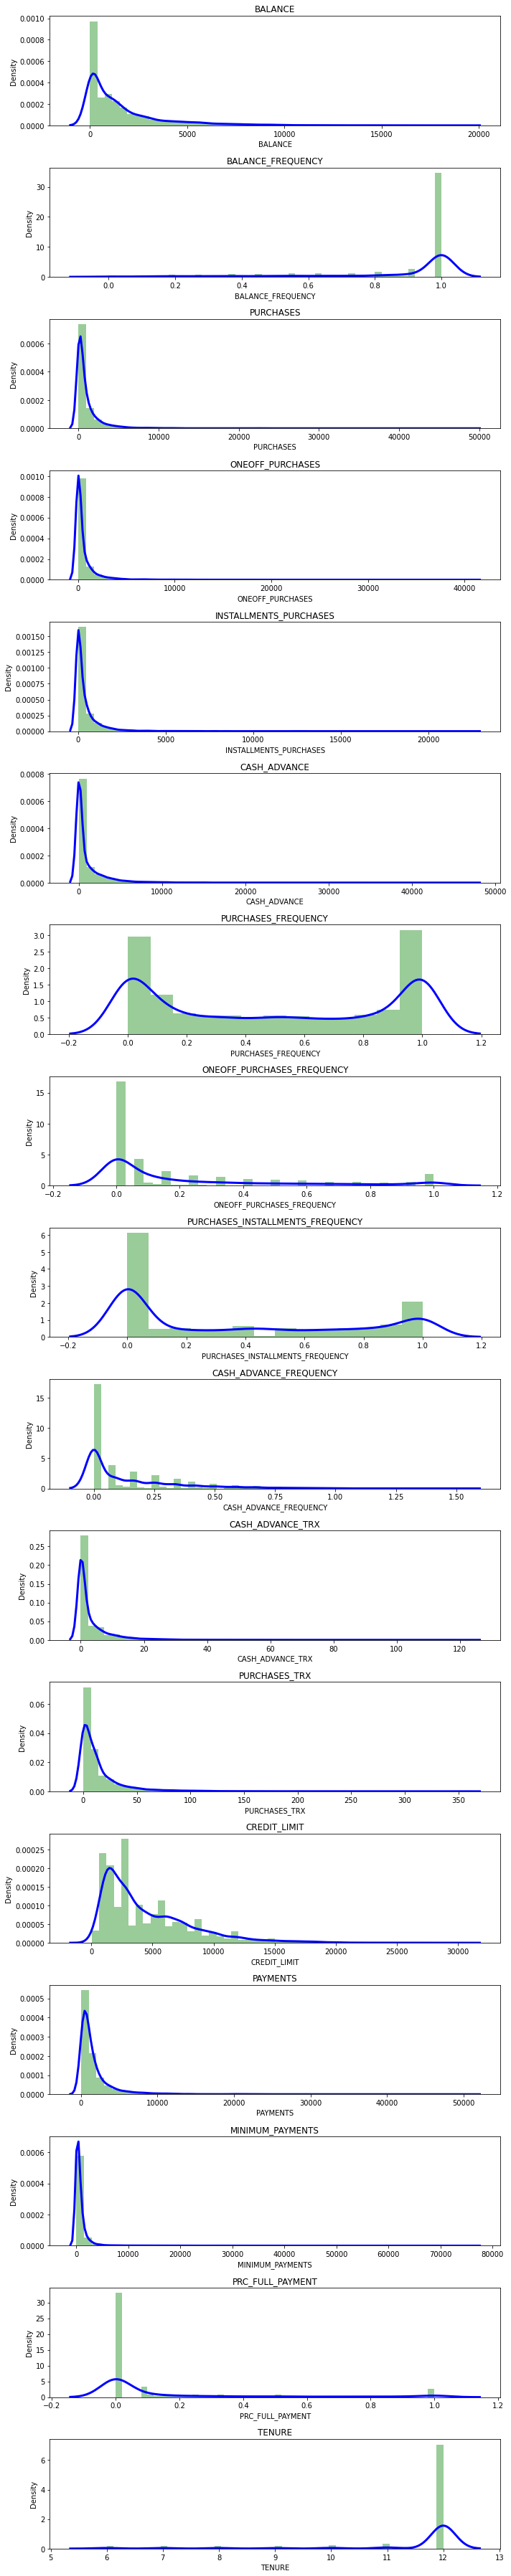

In [23]:
## looping through all columns in the dataset
n = len(marketing_data.columns)


## set figure side
plt.figure(figsize=(10,50))

# plotting the individual distribution for the features using subplot;
for i in range(n):
  plt.subplot(17, 1, i+1)
  sns.distplot(marketing_data[marketing_data.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(marketing_data.columns[i])

  plt.tight_layout()

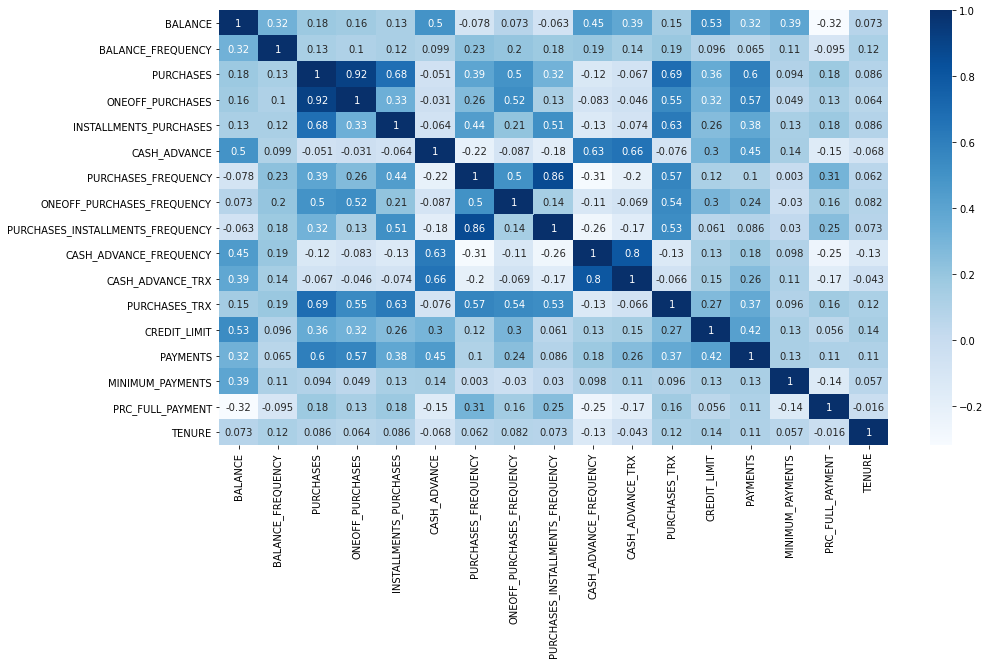

In [27]:
## Checking the correlation between the variables 
correlation = marketing_data.corr()
f, ax = plt.subplots(figsize = (15,8))
sns.heatmap(correlation, annot= True, cmap = 'Blues');

- We can spot some quite interesting correlation in the variables, eg we see a strong correlation between `PUCHASES` and `ONEOF PURCHASES` , this basically tells me that a lot of creditcard purchases made are one-off purchases. There are other interesting negative correlations as well.

# Modeling seesion

-  Since we are doing unsupervised learning. We shall use KMeans algorithms to help find an optimal number of clusters in our dataset. 

### Preprocessing

> We shall scale the dataset to normalize the datapoints in the same range of length

In [29]:
# Let's scale the data first using the standard scaler imported above. 
sc = StandardScaler()
marketing_data_scaled = sc.fit_transform(marketing_data)
marketing_data_scaled.shape

(8950, 17)

In [30]:
### Let's see the nature of the scaled data
marketing_data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

- We have data points with mean `0` and  standard deviation `1` as the standard scaler does it for us. It transform data into having a distribution of that of the normal distribution. 

In [31]:
## empty list to store the number of clusters defined by the KMeans algorithm
inertia_ = []

## we shall arbitrarily set the number of clusters between 1 and 20, and then find the optimal number of cluster using the Elbow method
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i) ## we define the number of cluster by "i"
  kmeans.fit(marketing_data_scaled) ## we fit the dataset into the algorithm to determine the clusters
  inertia_.append(kmeans.inertia_) ## we append the inertia, thus, the variance explained by the defined "i" clusters to visualize in getting the optimal clusters

Text(0, 0.5, 'Score WCSS')

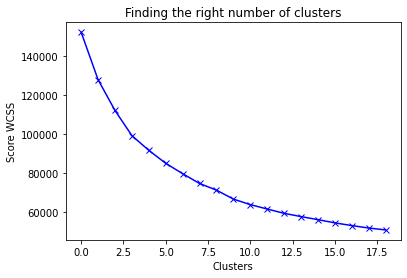

In [32]:
plt.plot(inertia_, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia WCSS')   ### WCSS is within cluster sum of squares

- Choosing the 8th point as the suitable number of clusters, we fit the KMeans aglorithm to find 8 clusters

In [33]:
### Fit KMeans for 8 clusters
kmeans = KMeans(8)
kmeans.fit(marketing_data_scaled)
labels = kmeans.labels_

In [35]:
### Check the unique classes in the predicted labels and number of observations
set(labels), labels.shape

({0, 1, 2, 3, 4, 5, 6, 7}, (8950,))

In [36]:
### Let's concat the labels to the dataframe

marketing_data['cluster'] = labels
marketing_data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,4
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,7


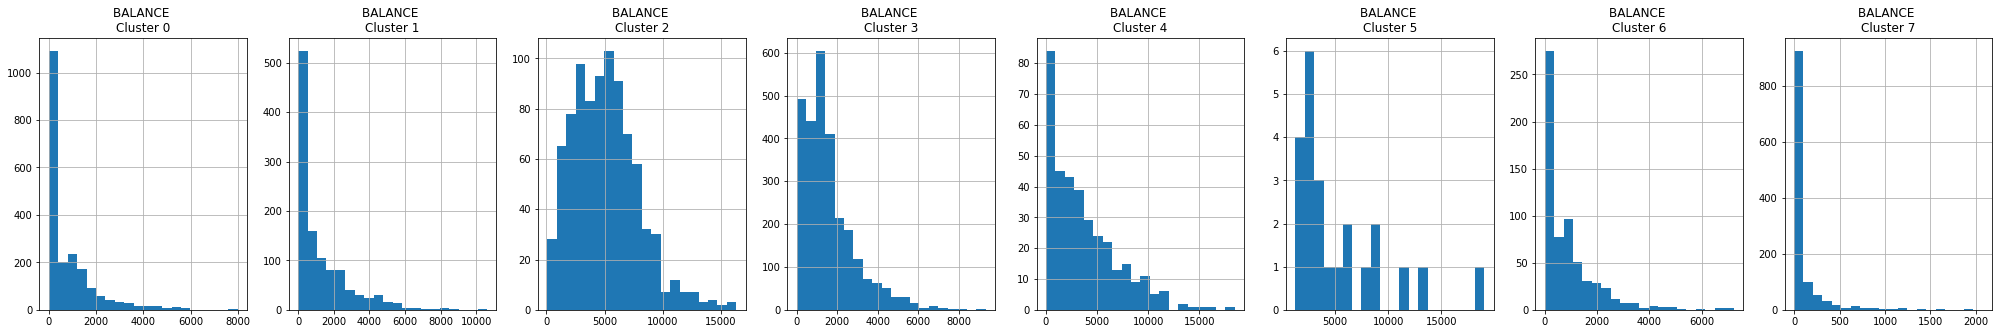

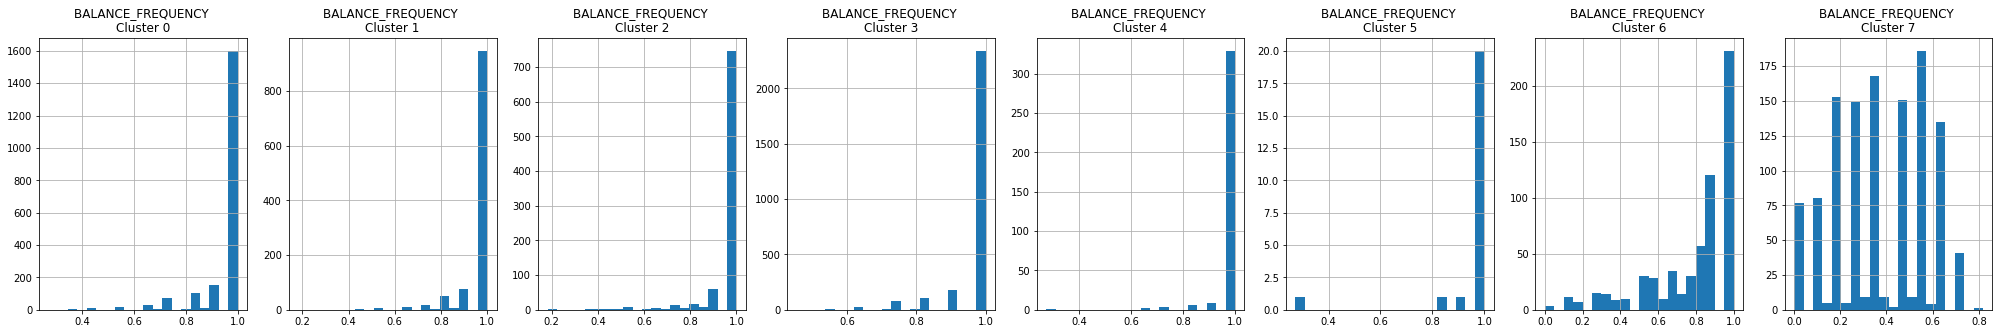

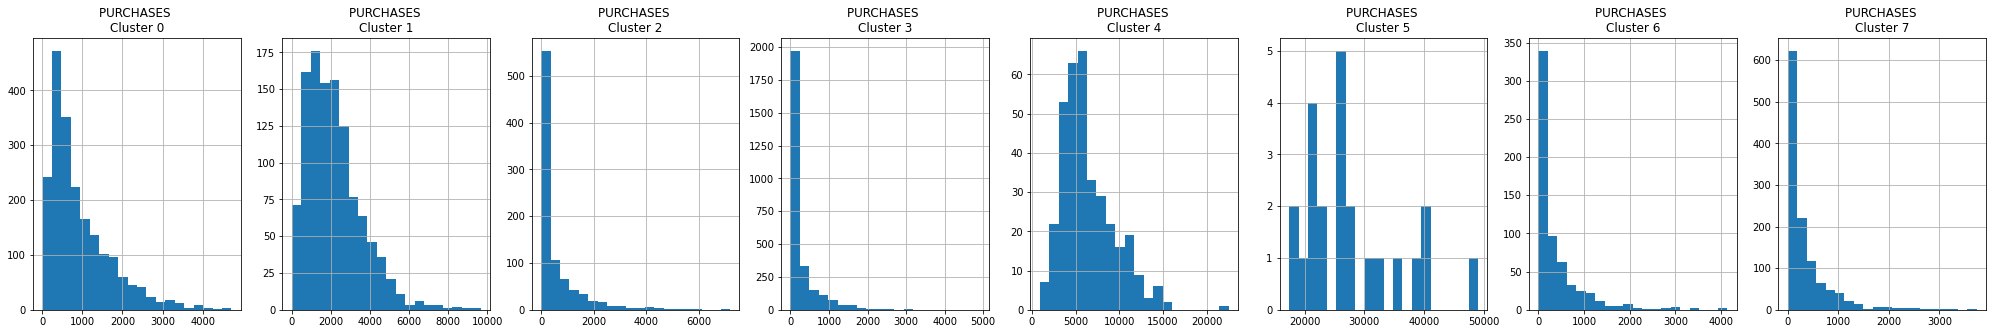

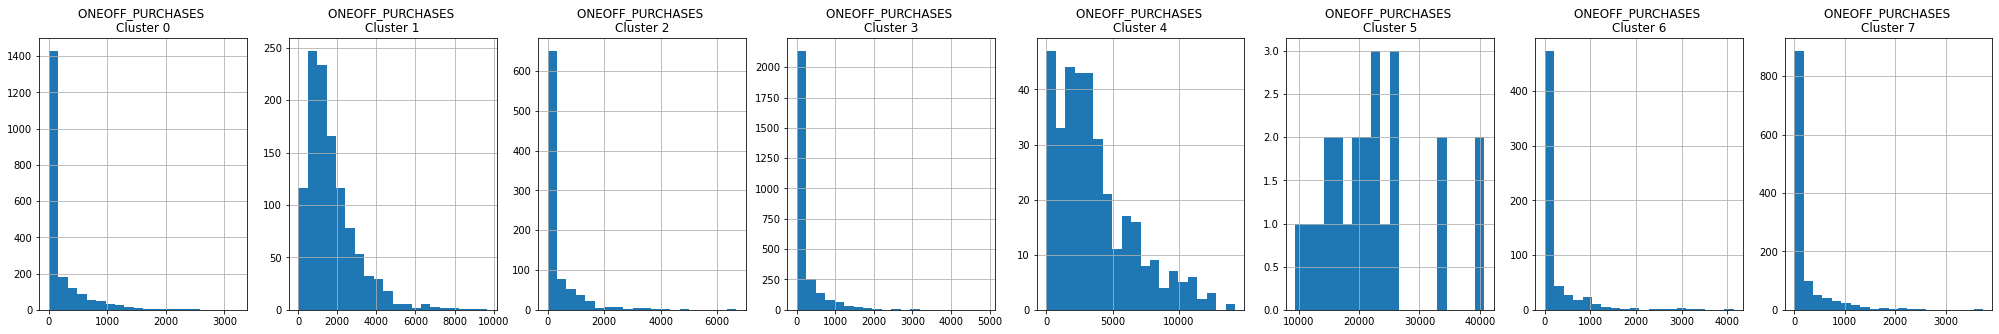

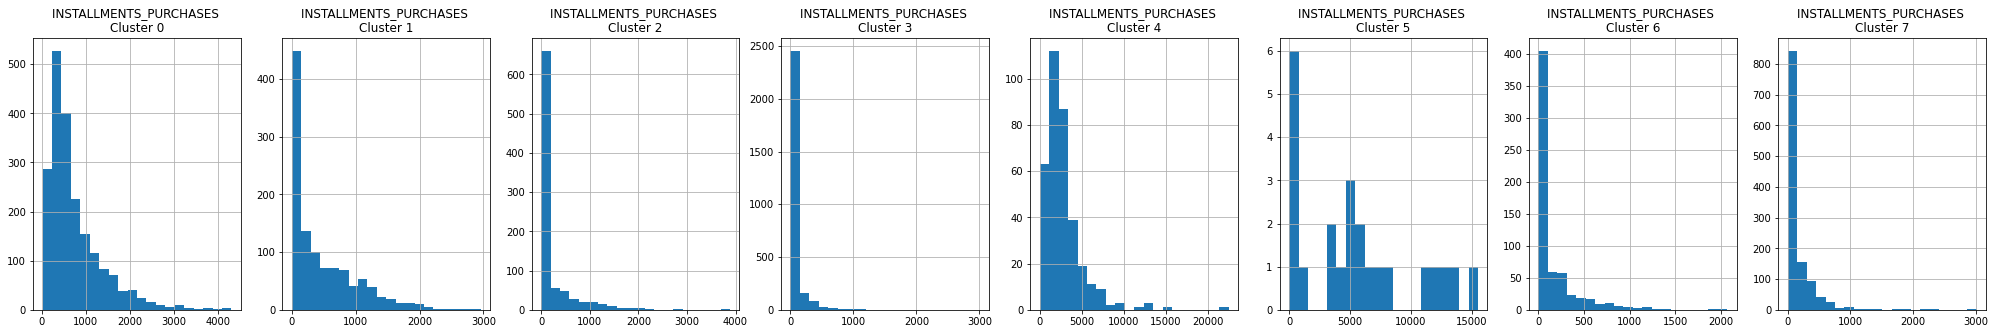

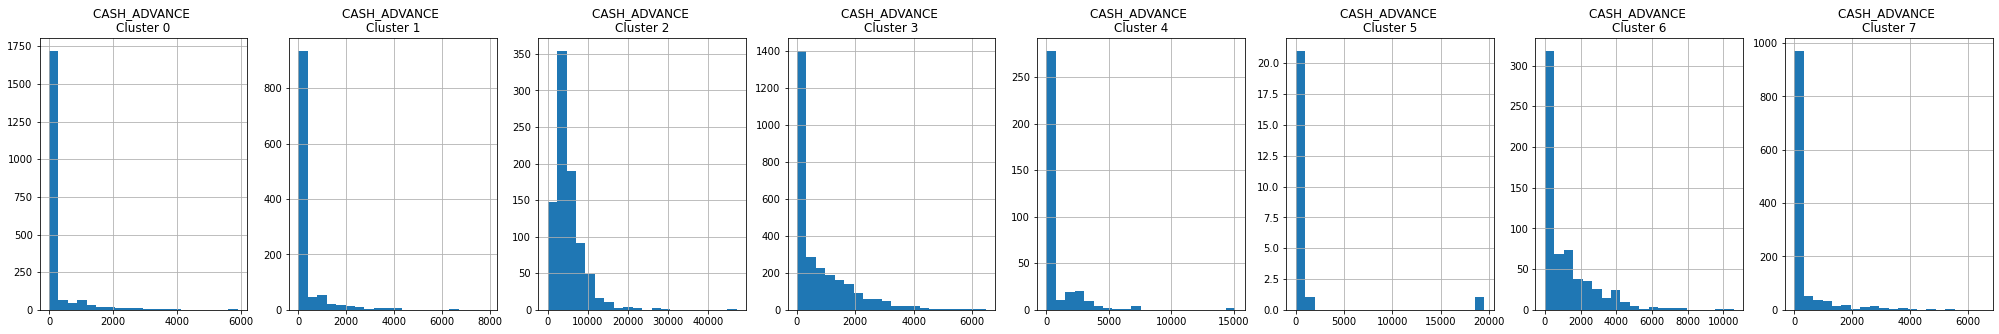

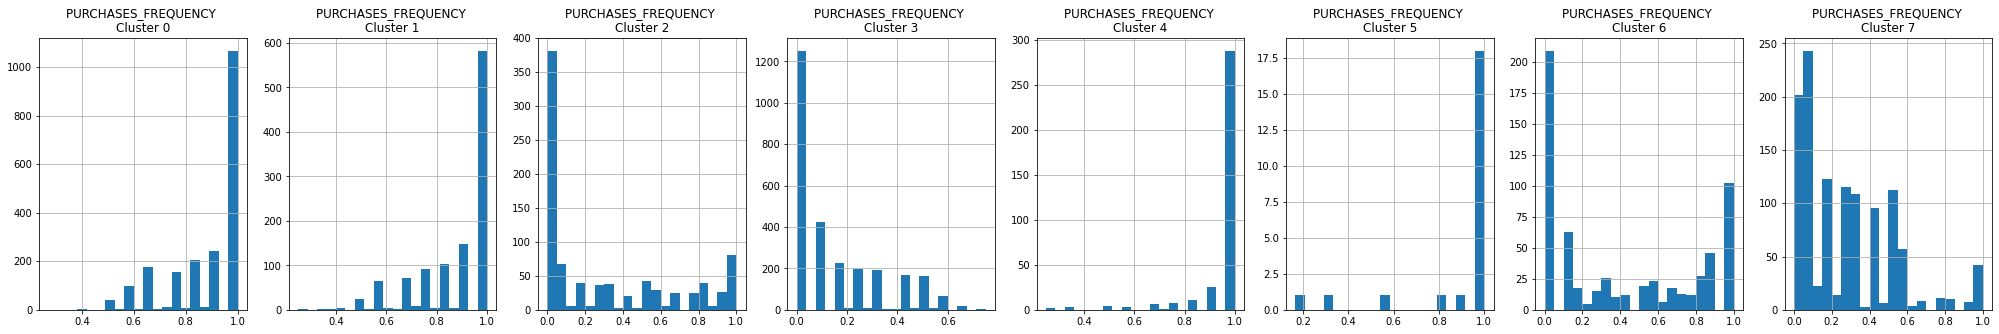

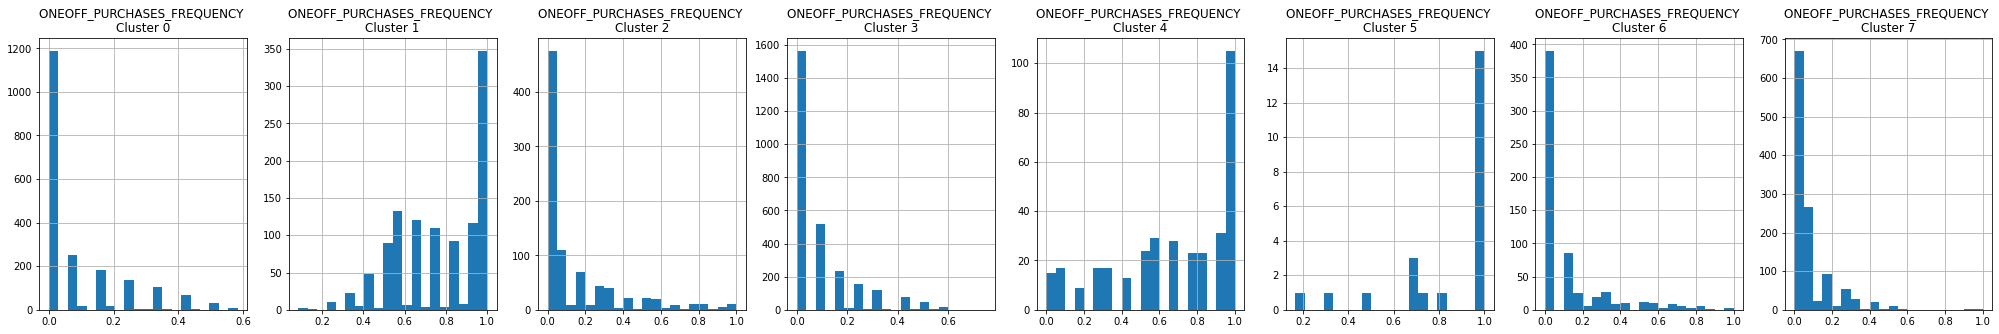

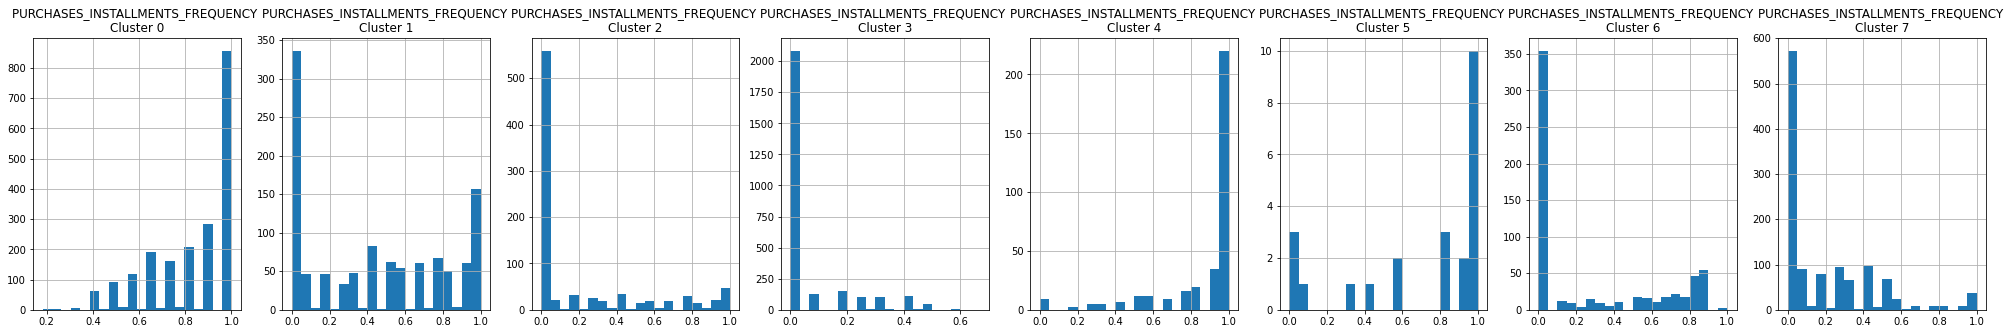

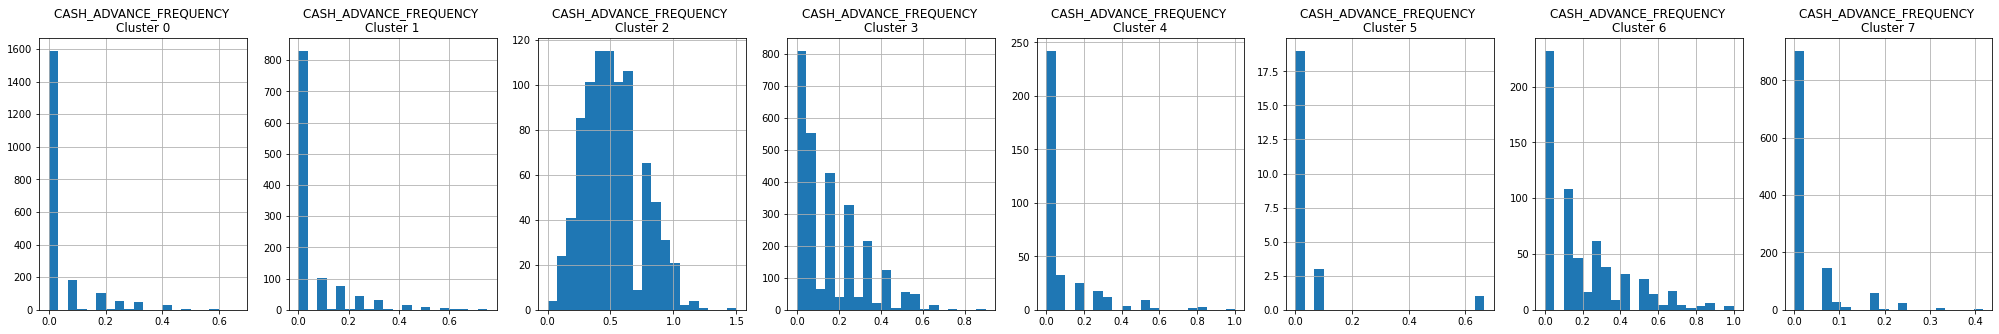

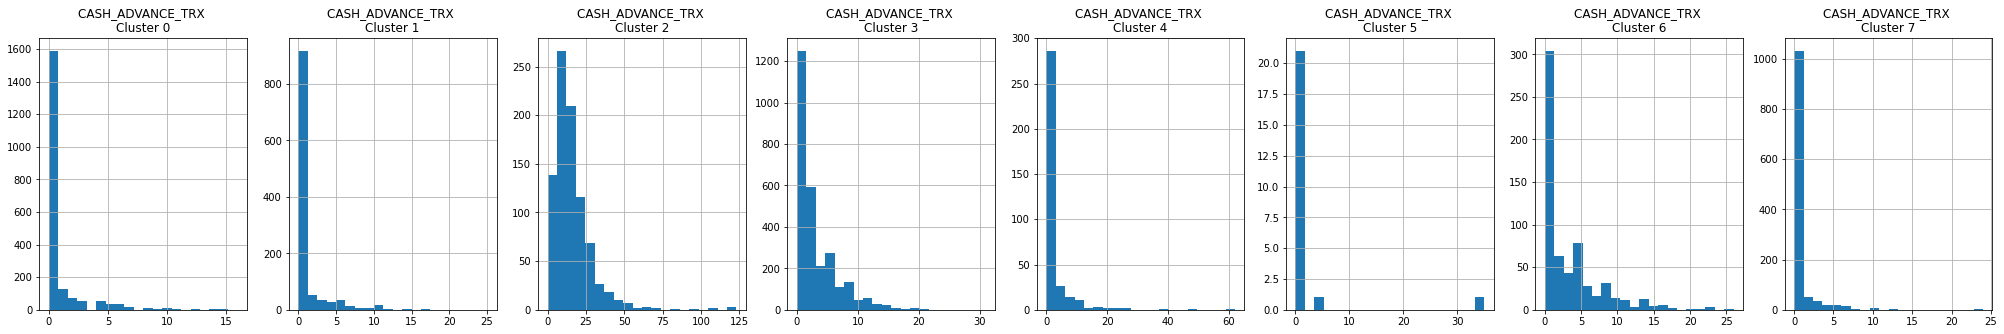

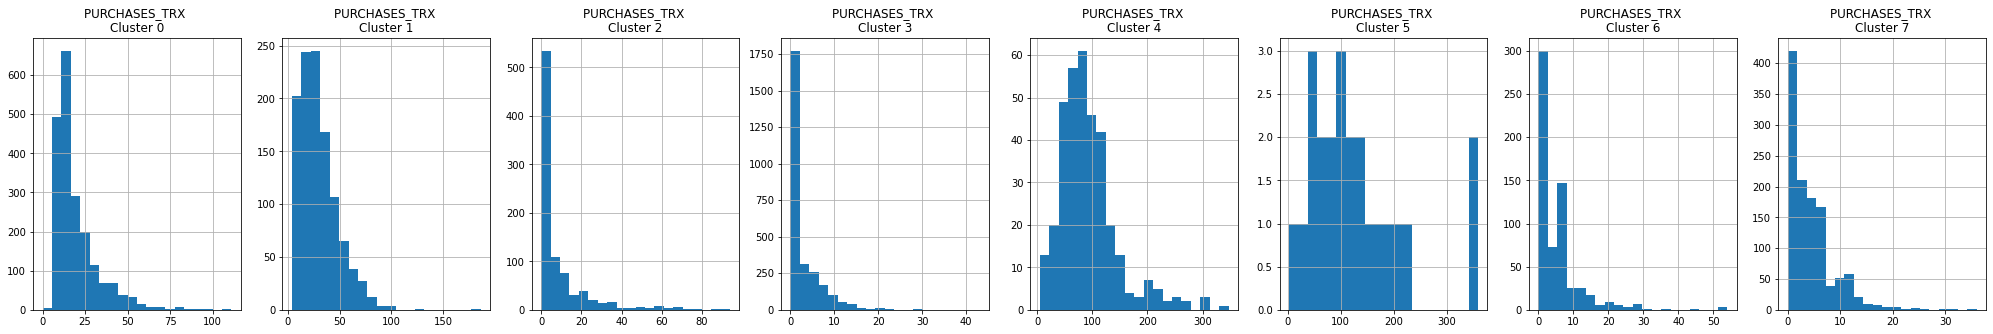

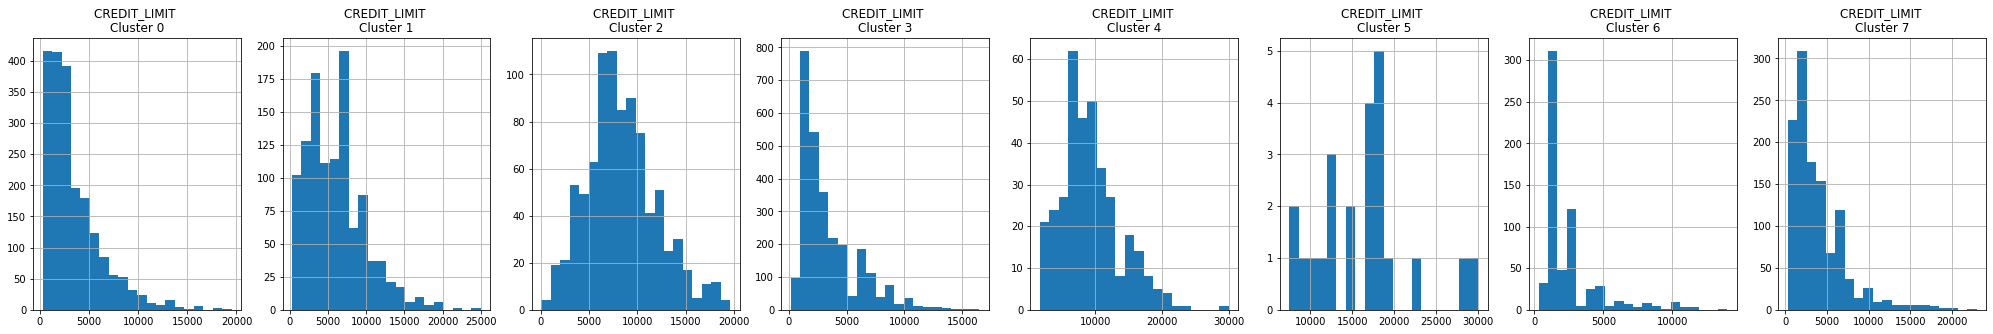

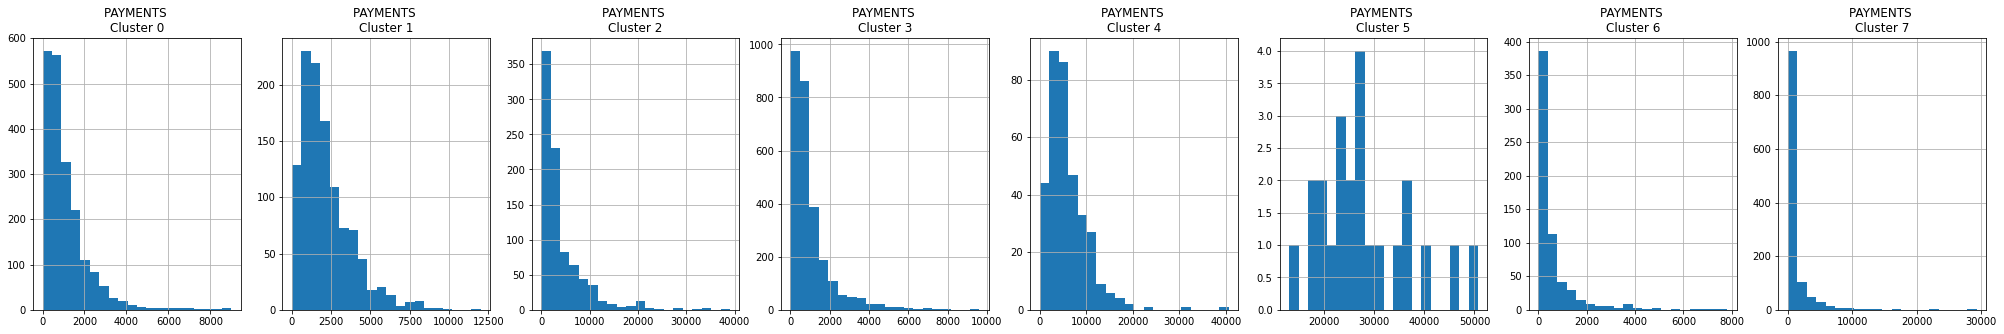

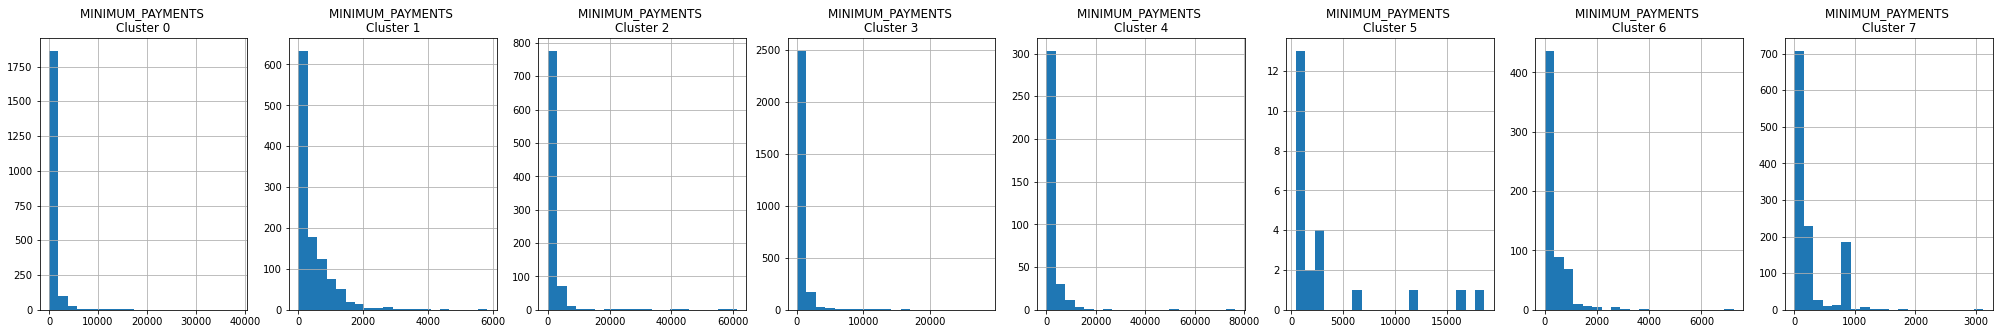

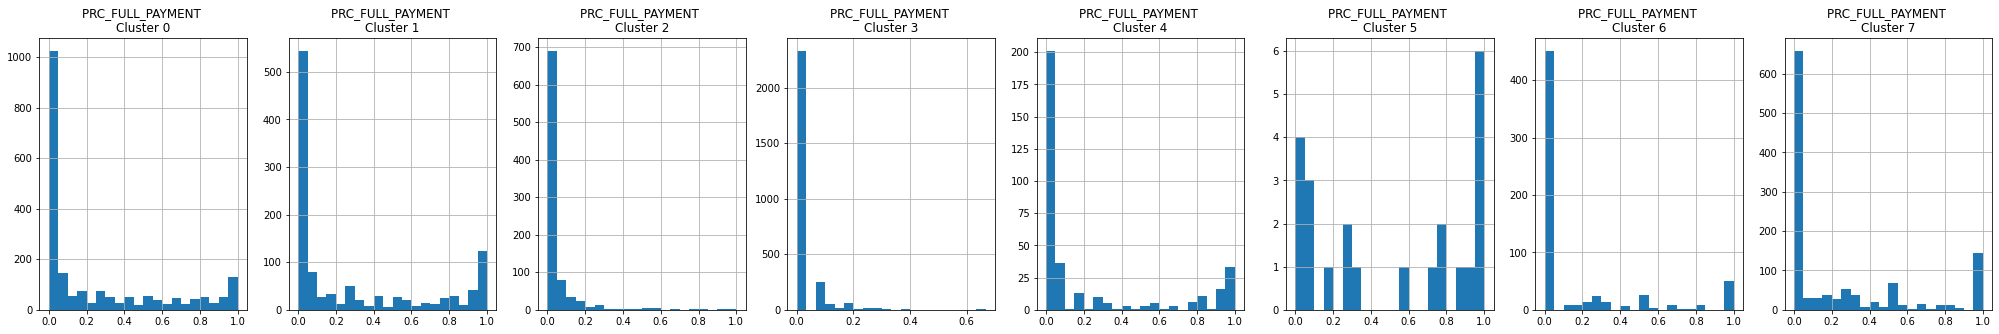

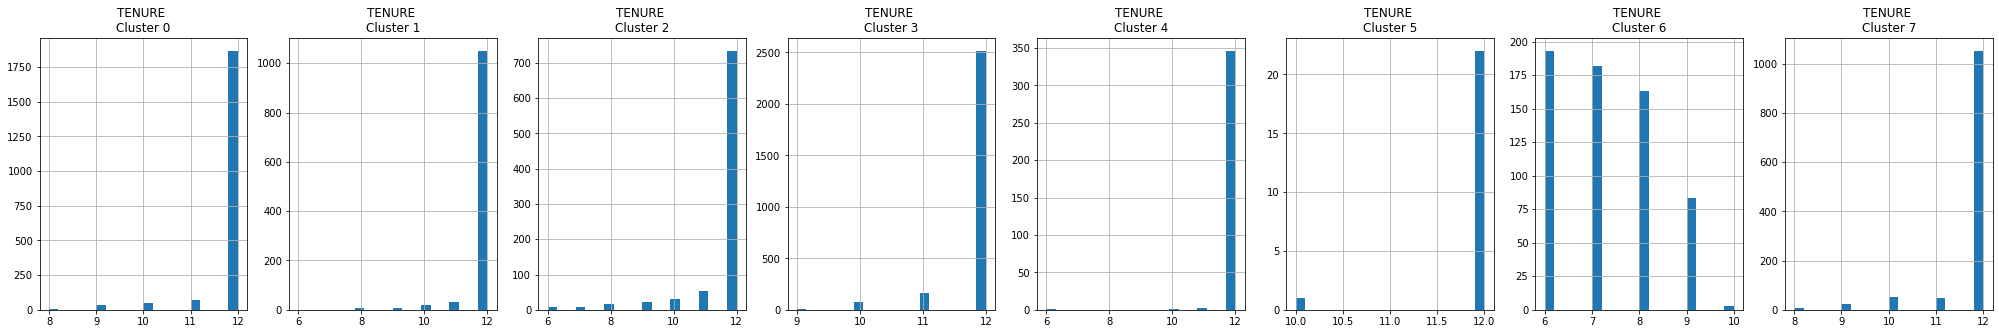

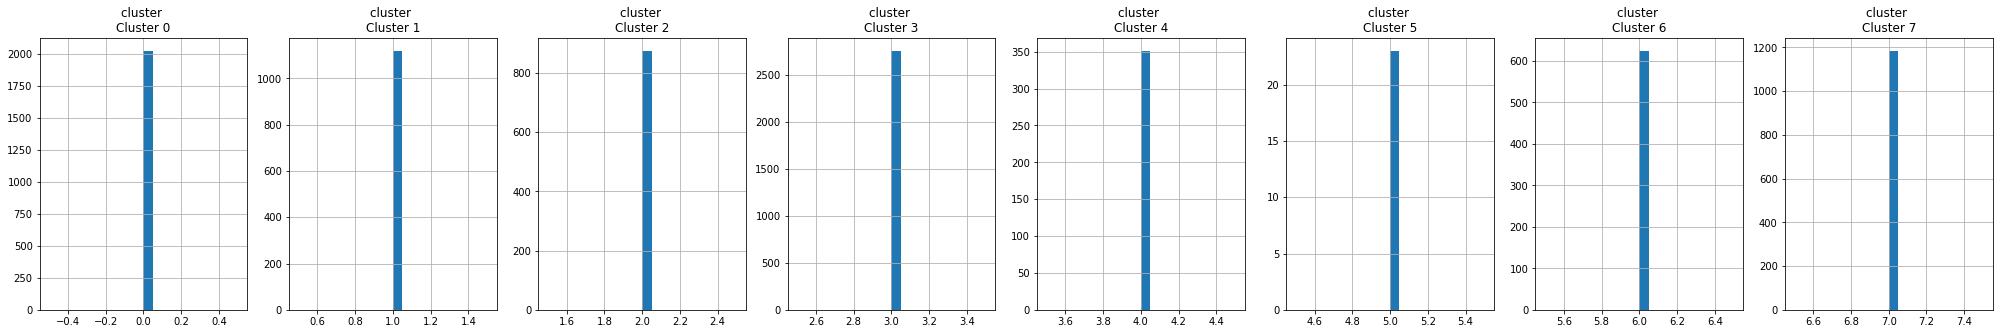

In [40]:
## We shall visualize by a histogram plot, the various clusters
# Plot the histogram of various clusters
for i in marketing_data.columns:
  plt.figure(figsize=(35,5))
  for j in range(8): ## We have 8 classes, from 0-7
    plt.subplot(1,8,j+1)
    cluster = marketing_data[marketing_data['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show

- This gives a quick overview of the distribution of the various features across all the clusters. 

In [41]:
### I will use principal component to help visualize the cluster in a proper way

# Obtain the principal components 
pca = PCA(n_components=2) ## for 2 components
principal_components = pca.fit_transform(marketing_data_scaled)
principal_components

array([[-1.6822199 , -1.07644904],
       [-1.13830386,  2.50647293],
       [ 0.96968039, -0.38352299],
       ...,
       [-0.92619836, -1.81078138],
       [-2.33654463, -0.65796179],
       [-0.55642251, -0.400471  ]])

In [42]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(principal_components, columns = ['pca_one', 'pca_two'])
pca_df.head()

,pca_one,pca_two
0,-1.682220,-1.076449
1,-1.138304,2.506473
2,0.969680,-0.383523
3,-0.873630,0.043166
4,-1.599432,-0.688578


In [43]:
# Concatenate the clusters labels to the dataframe
pca_df['cluster'] = labels
pca_df.head()

,pca_one,pca_two,cluster
0,-1.682220,-1.076449,3
1,-1.138304,2.506473,2
2,0.969680,-0.383523,1
3,-0.873630,0.043166,3
4,-1.599432,-0.688578,3


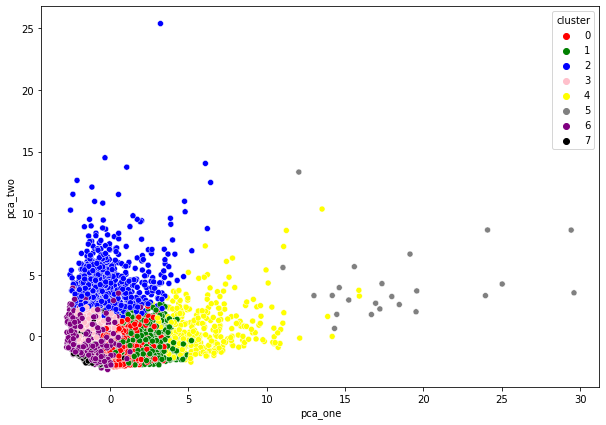

In [45]:
## Let's visualize the 8 clusters;

plt.figure(figsize=(10,7))
sns.scatterplot(x='pca_one', 
                y='pca_two', 
                data = pca_df, 
                hue = 'cluster', 
                palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']
                );

### Using PCA is reduced the dimension for possible visualization. I will explore the `autoencoders` dimensionality reduction technique to contrast with the PCA

In [46]:
### Using tensroflow is a great need here
import tensorflow as tf

In [47]:
## Creating the input shape
input_df = tf.keras.layers.Input(shape = (17,))

## input data layers
x = tf.keras.layers.Dense(7, activation='relu')(input_df)
x = tf.keras.layers.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

## creating the encoding units
encoded = tf.keras.layers.Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x) ## The encoder units gives the number features after the training, 
                                                                                                    ##thus, in our case, reduced version of 10 features
x = tf.keras.layers.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = tf.keras.layers.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

### decoded layer
decoded = tf.keras.layers.Dense(17, kernel_initializer='glorot_uniform')(x)

## automodel
autoenconder = tf.keras.models.Model(input_df, decoded)

## Encoder model
encoder = tf.keras.models.Model(input_df, encoded)

autoenconder.compile(optimizer = 'adam', loss = 'mse')

In [48]:
# Check the summary of the  model
autoenconder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [49]:
## Train the encoder-decoder
train_history = autoenconder.fit(marketing_data_scaled, marketing_data_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 59ms/step - loss: 0.4962
Epoch 2/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2472
Epoch 3/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1907
Epoch 4/25
70/70 [==============================] - 4s 62ms/step - loss: 0.1605
Epoch 5/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1508
Epoch 6/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1347
Epoch 7/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1189
Epoch 8/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1114
Epoch 9/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1049
Epoch 10/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0973
Epoch 11/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1012
Epoch 12/25
70/70 [==============================] - 4s 55ms/step - loss: 0.0900
Epoch 13/25
70/70 [==================

In [50]:
## Getting the reduced version of our data.
predicted_reduced_data = encoder.predict(marketing_data_scaled)

### Now I will perform the KMeans on the reduced data to compare with the number of cluster that could  be gotten from the data

In [51]:
## get the new clusters
inertia_second = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(predicted_reduced_data)
  inertia_second.append(kmeans.inertia_)

Text(0, 0.5, 'Score WCSS')

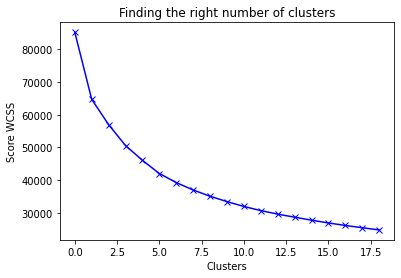

In [52]:
### Visualizing the Elbow plot 
plt.plot(inertia_second, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Score WCSS')

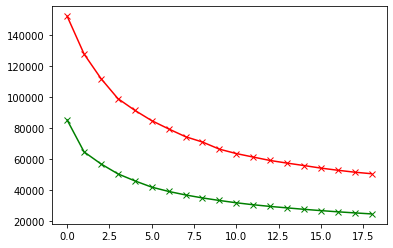

In [53]:
### Now, let me compare with the original dataset elbow plot
plt.plot(inertia_, 'bx-', color = 'r')
plt.plot(inertia_second, 'bx-', color = 'g')

- Do you spot any difference here? Well, I think we are getting lesser number of classes here than before. I will cut the optimal classes around `4`

In [54]:
### Fitting for 4 classes
kmeans = KMeans(4)
kmeans.fit(predicted_reduced_data)
labels_2 = kmeans.labels_

In [55]:
### Let's visualize 
pca_auto = pca.fit_transform(predicted_reduced_data) ### by default we fit for 2 components
pca_auto = pd.DataFrame(pca_auto, columns = ['pca_1', 'pca_2'])
pca_auto['cluster'] = labels_2
pca_auto.head(10)

,pca_1,pca_2,cluster
0,-1.893452,-0.110510,1
1,0.478835,1.620255,2
2,-0.729966,-0.242861,1
3,-1.063375,0.089152,1
4,-2.024662,0.020937,1
5,-0.831668,-0.685718,1
6,3.681100,-2.313625,0
7,-0.921283,-0.827872,1
8,-1.217589,-0.179809,1
9,-0.862434,-0.061043,1


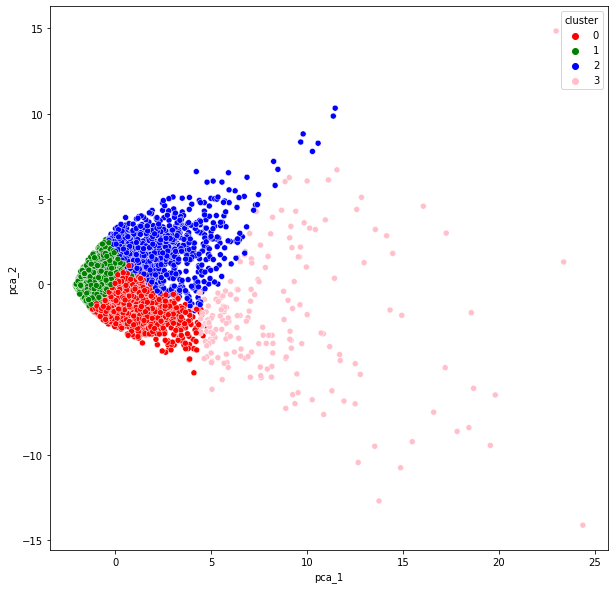

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1', 
                y='pca_2', 
                data = pca_auto, 
                hue = 'cluster', 
                palette=['red', 'green', 'blue', 'pink']
                );

### Waaaooooo!!! What a better cluster I see here! It is obvious, after autoencoder reduction technique I see 4 clusters seem better off than 8 clusters. Hence, the creditcard data can be best segmented into 4 groups of customers

- Last thing I will do in this notebook is to plot the histogram distribition for the various clusters.

In [57]:
### Create a copy of the original marketing data with the first cluster dropped

marketing_data_second = marketing_data.drop('cluster', axis=1).copy()

## concat the second label to the new data without clusters
marketing_data_second['cluster'] = labels_2

## Have a view of the new data
marketing_data_second.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


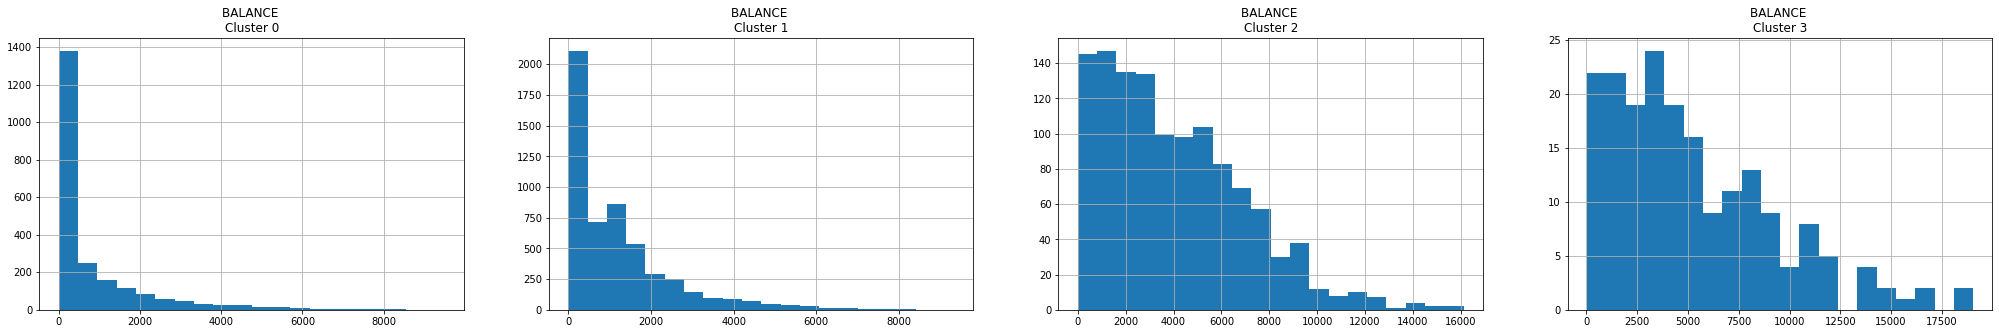

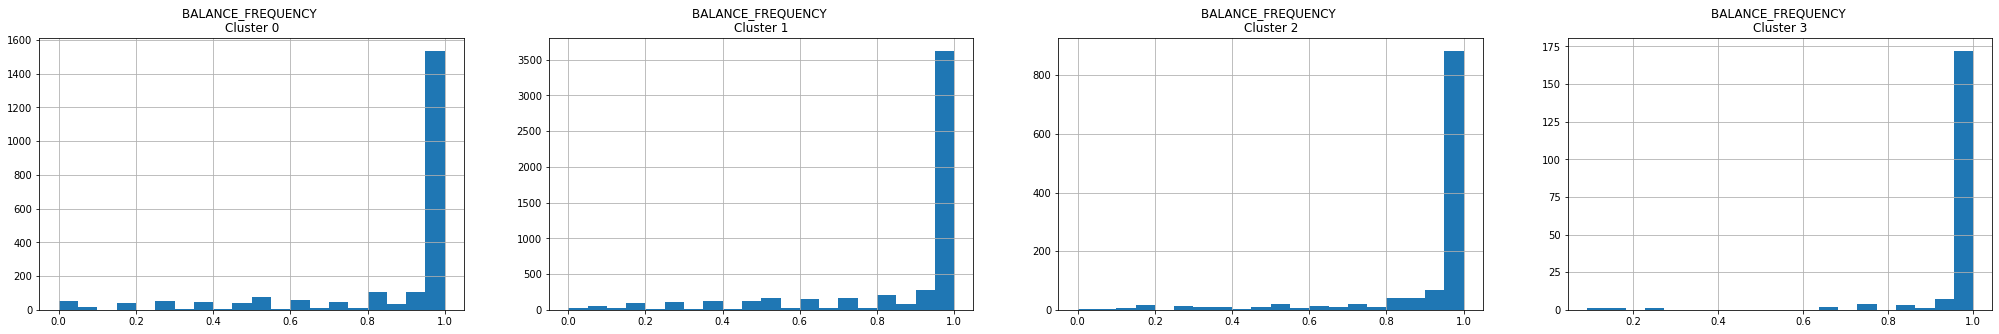

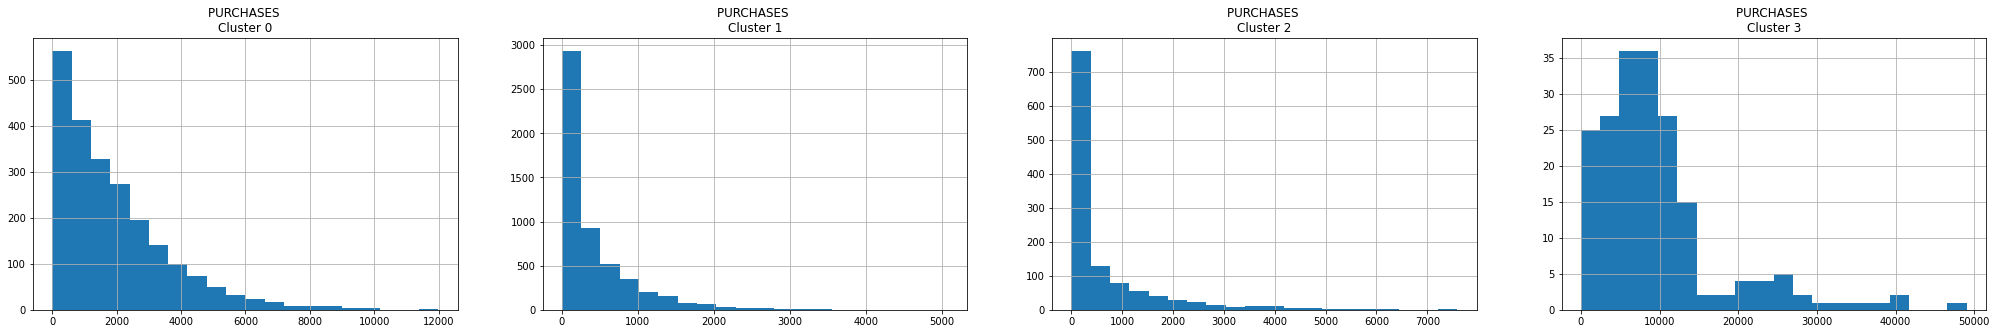

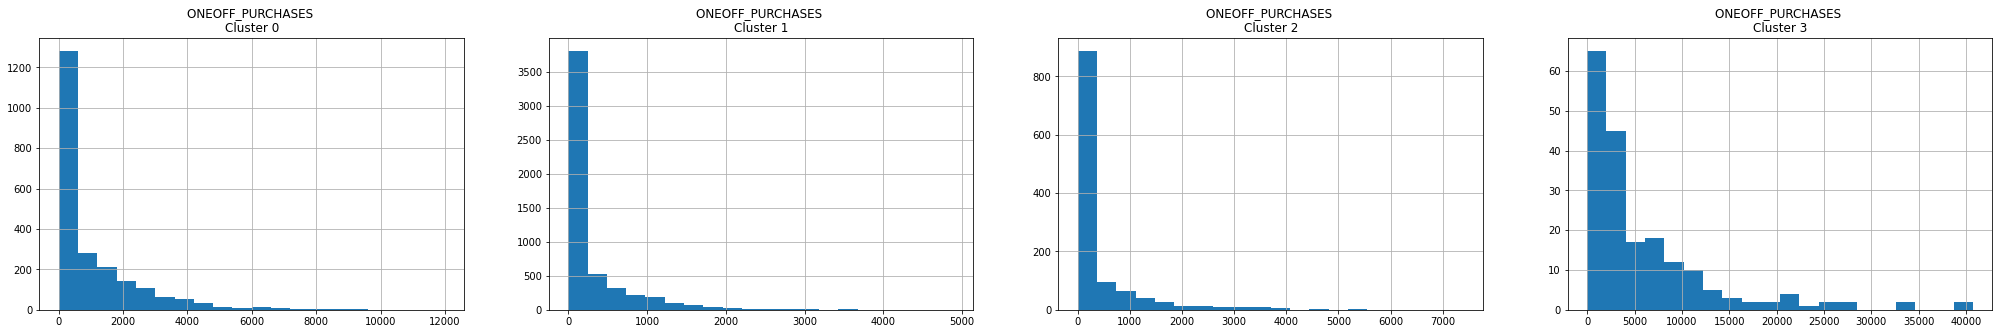

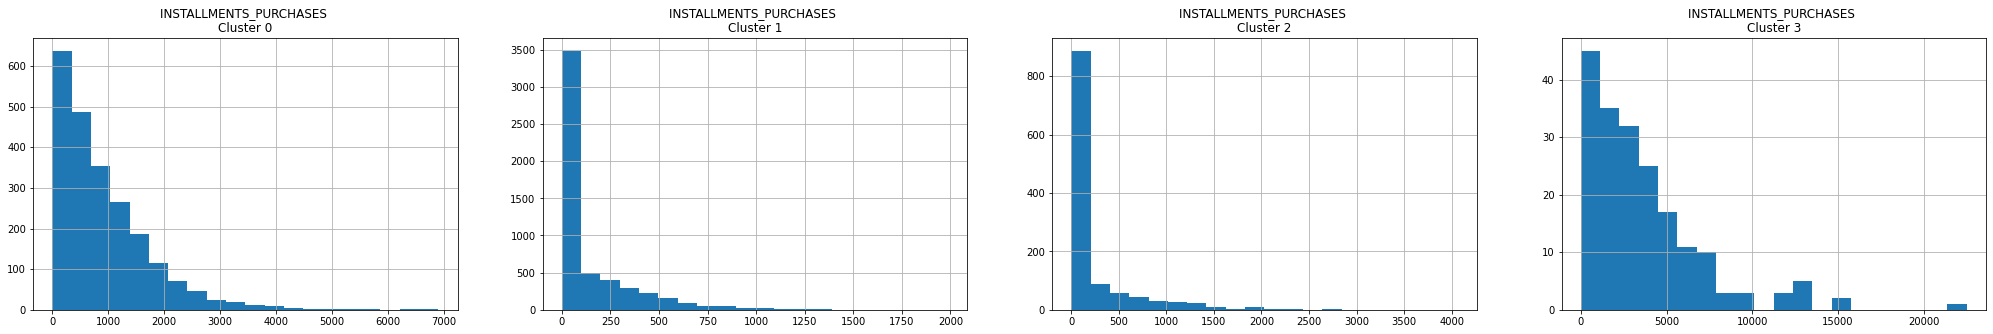

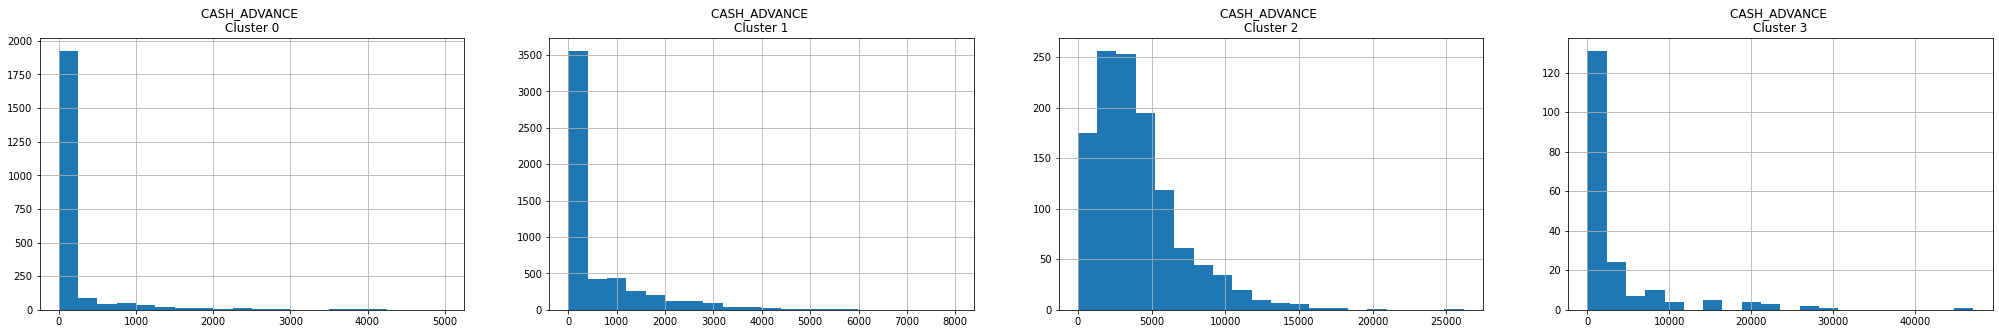

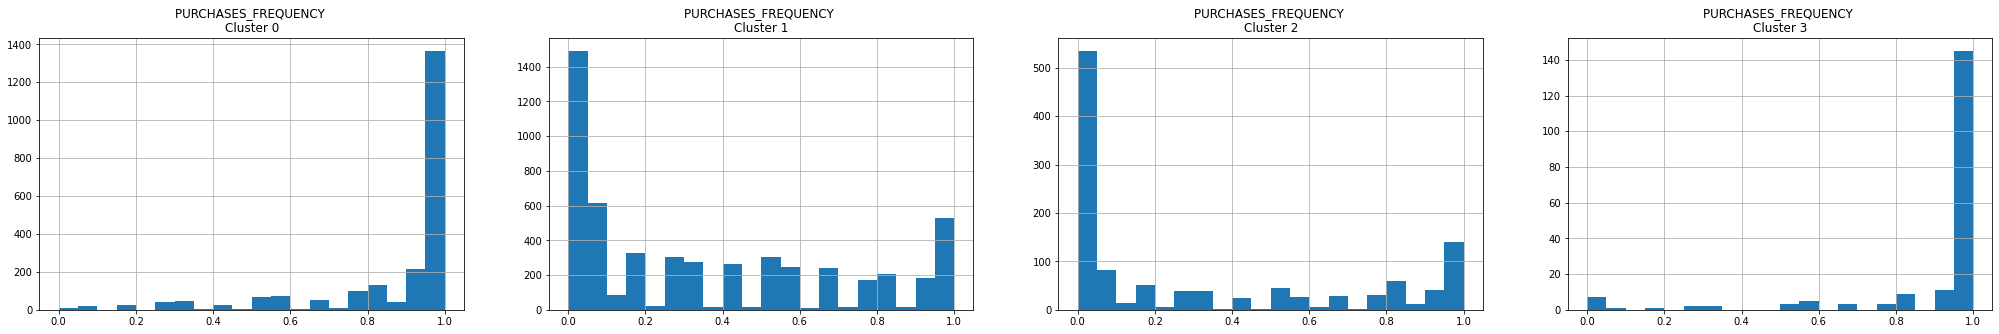

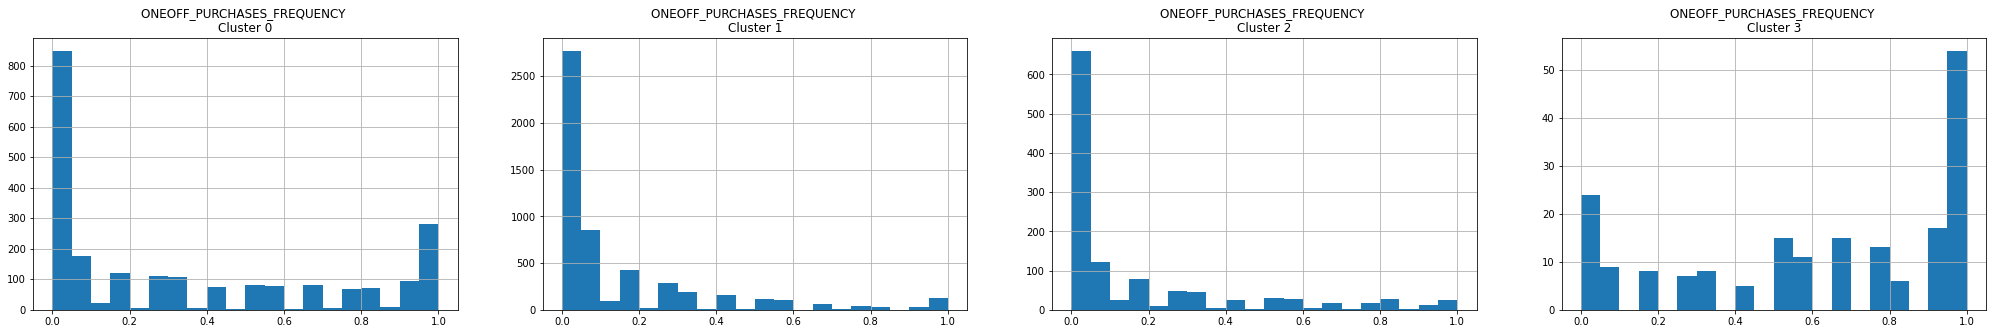

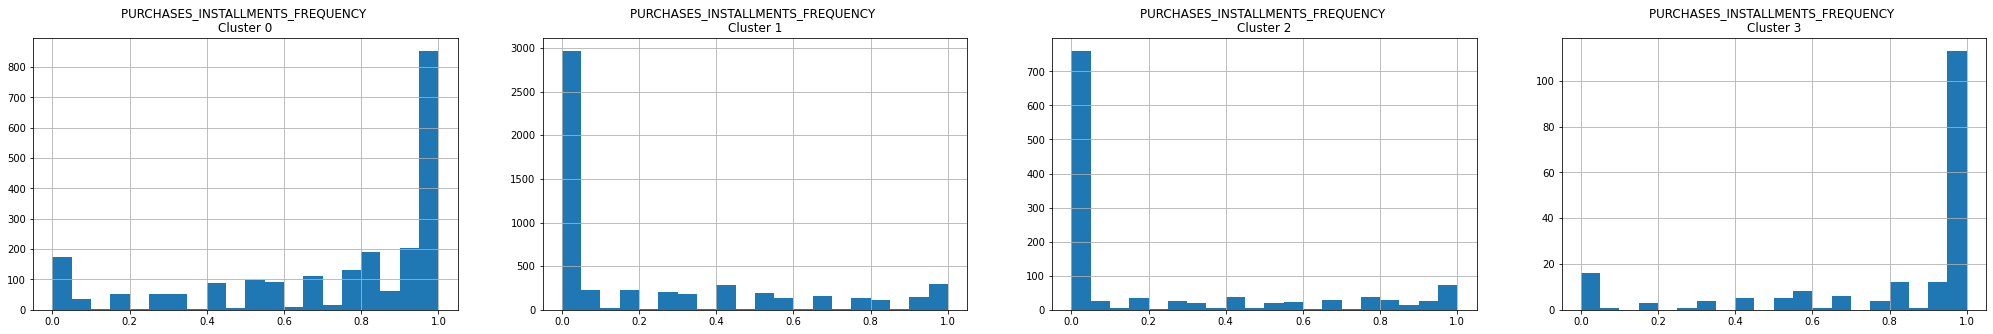

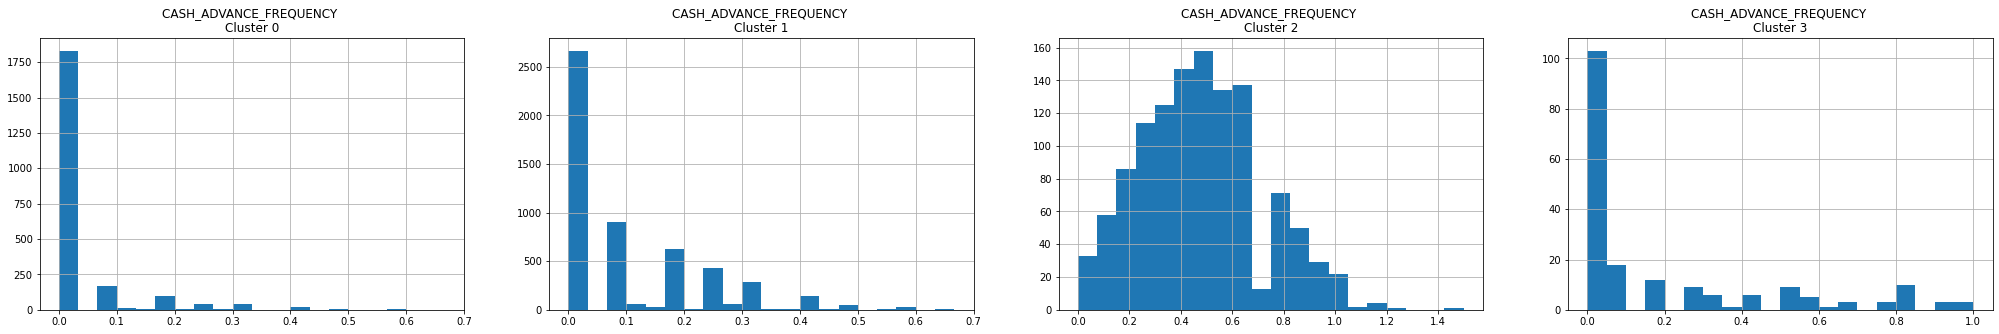

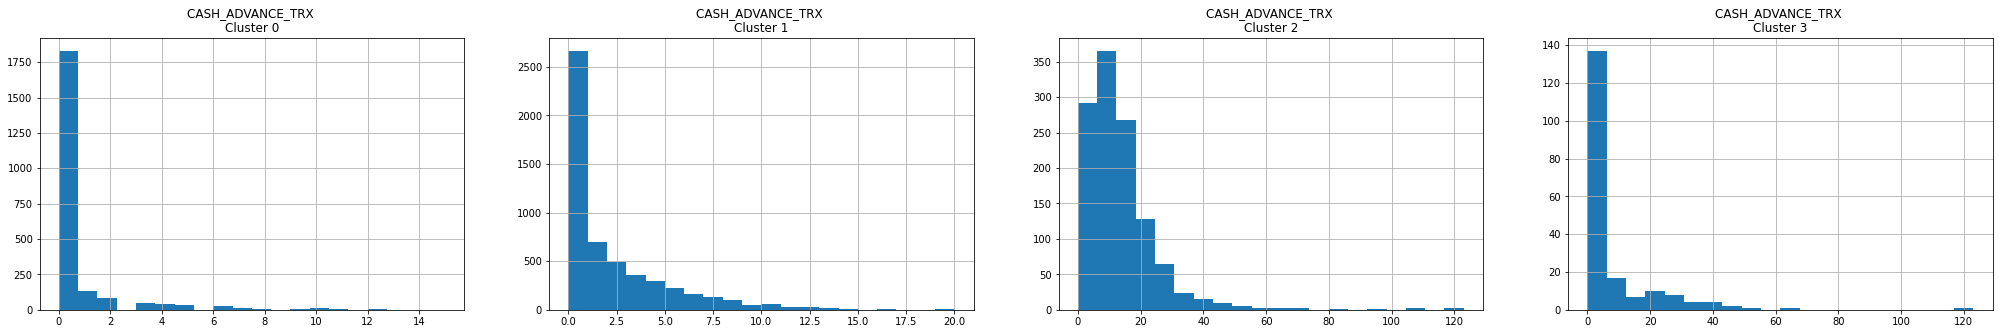

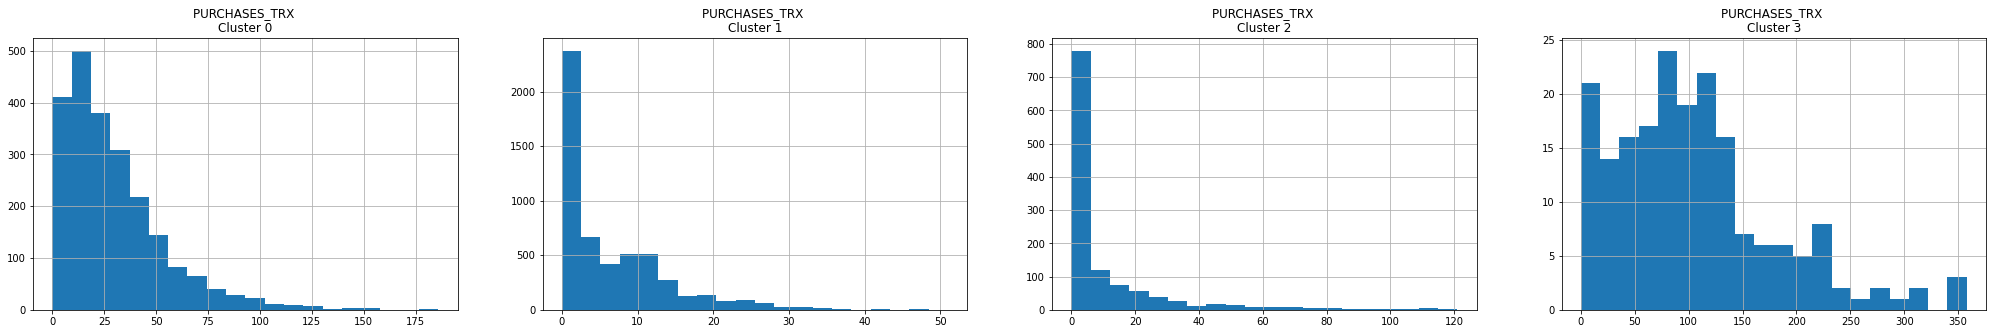

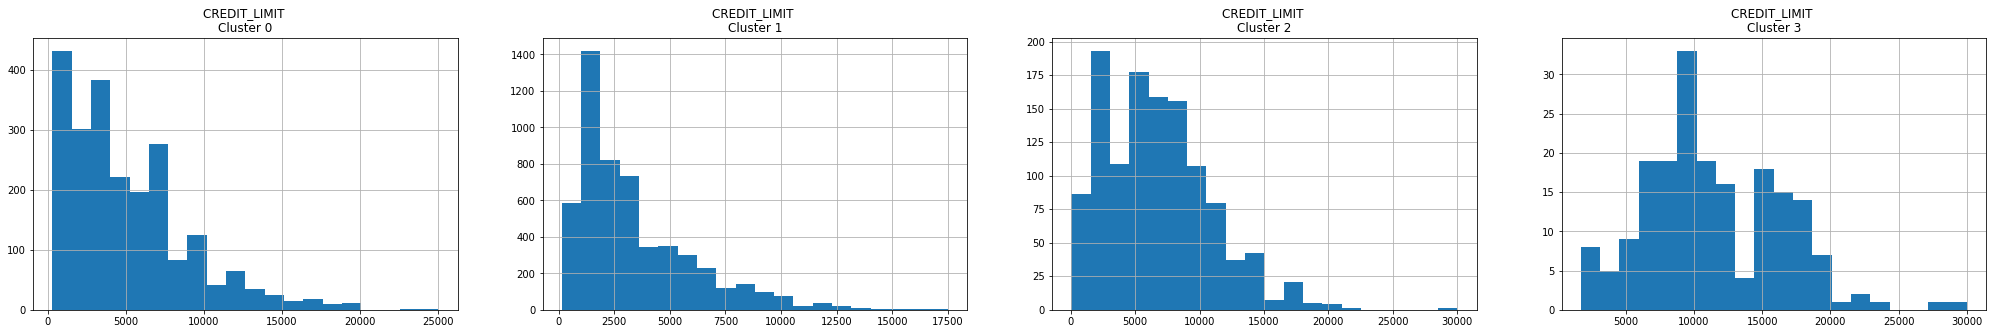

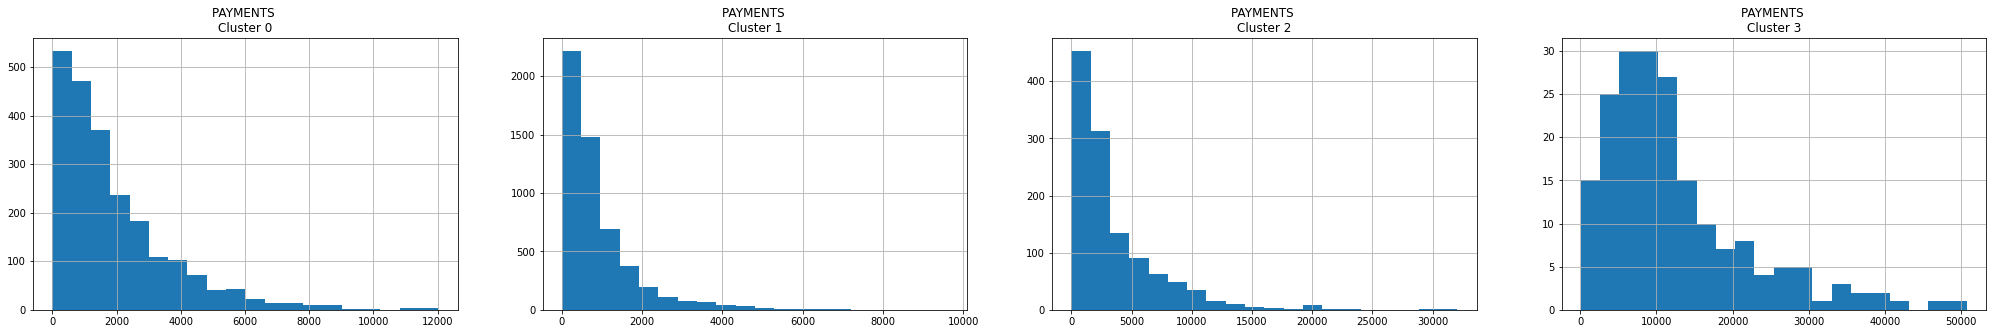

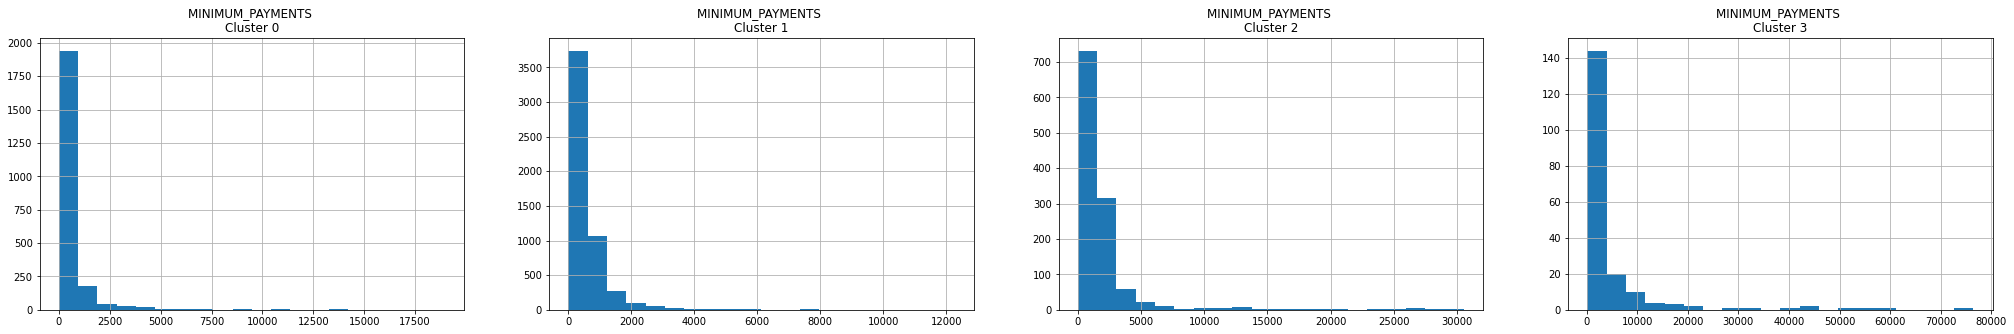

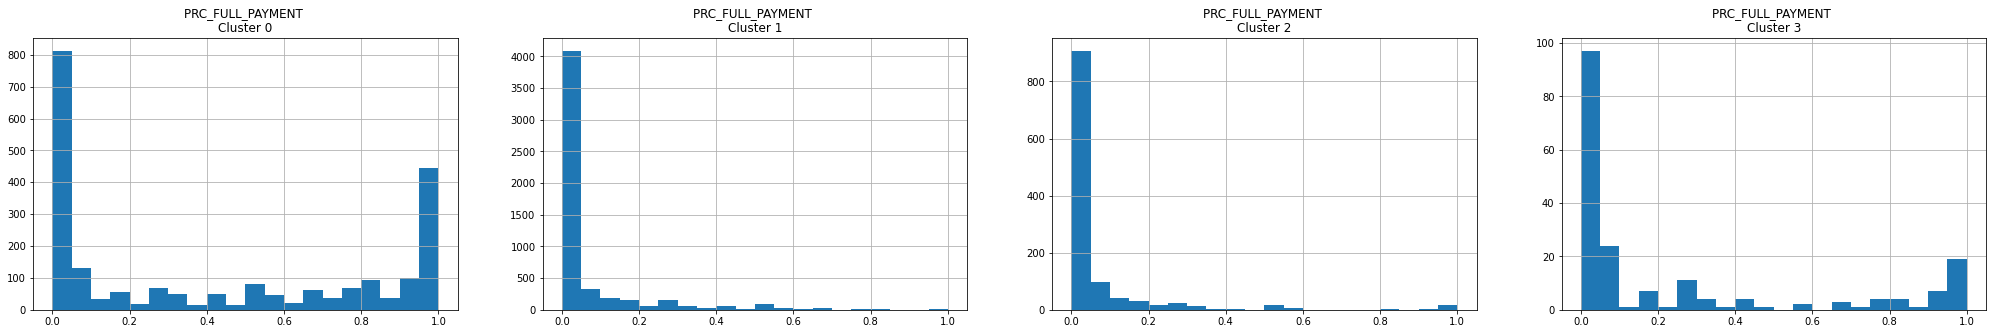

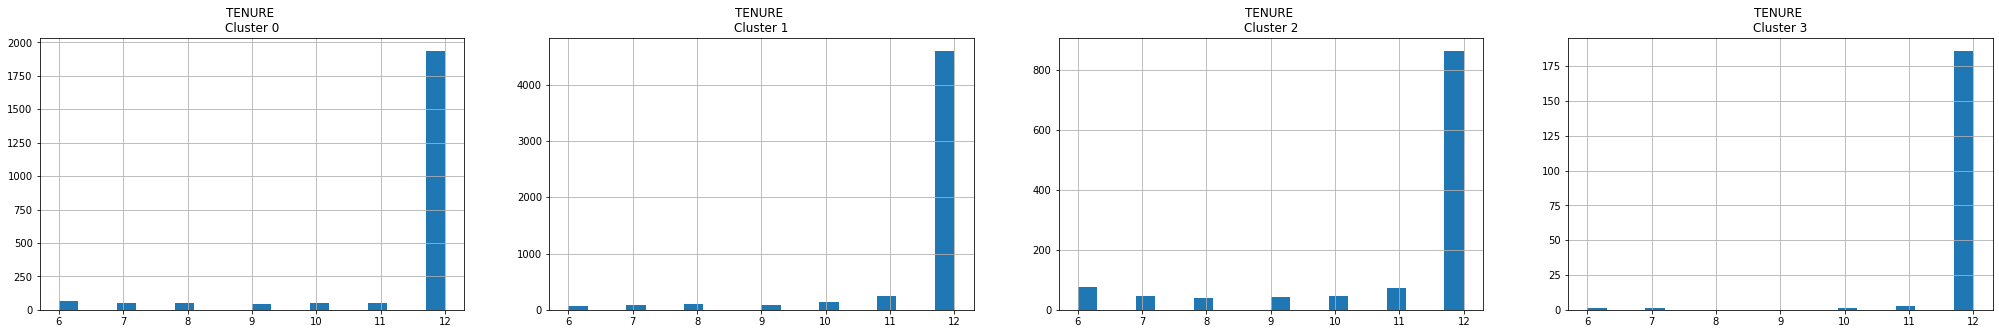

In [60]:
# Plot the histogram of the 4 various clusters

for i in marketing_data_second.columns[:-1]: ## remove the cluster from the plot
  plt.figure(figsize=(35,5))
  for j in range(4): ## We have 8 classes, from 0-7
    plt.subplot(1,4,j+1)
    cluster = marketing_data_second[marketing_data_second['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show

- This gives an easy overview of how the variables are distributed in each cluster. It's an informative and a simple dashboard that calls for more investigation into answering the questions of customer satisfaction and product services